In [16]:
import os
import talib as ta
import yfinance as yf
import plotly.express as px

In [17]:
os.chdir('../scripts/')
import data_loader as data_loader
import financial_analyzer as financial_analyzer


# Importing the financial data for analysis

In [18]:
all_data_path = '../data/yfinance_data/AAPL_historical_data.csv'
df = data_loader.read_csv_file(all_data_path)
df = df.get("data")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [21]:
df.head()
financial_analyzer.FinancialAnalyzer.calculate_technical_indicators(df)
df.isnull().sum()
df.shape

(10998, 14)

In [22]:
df.dropna(inplace=True)
df.shape

(10965, 14)

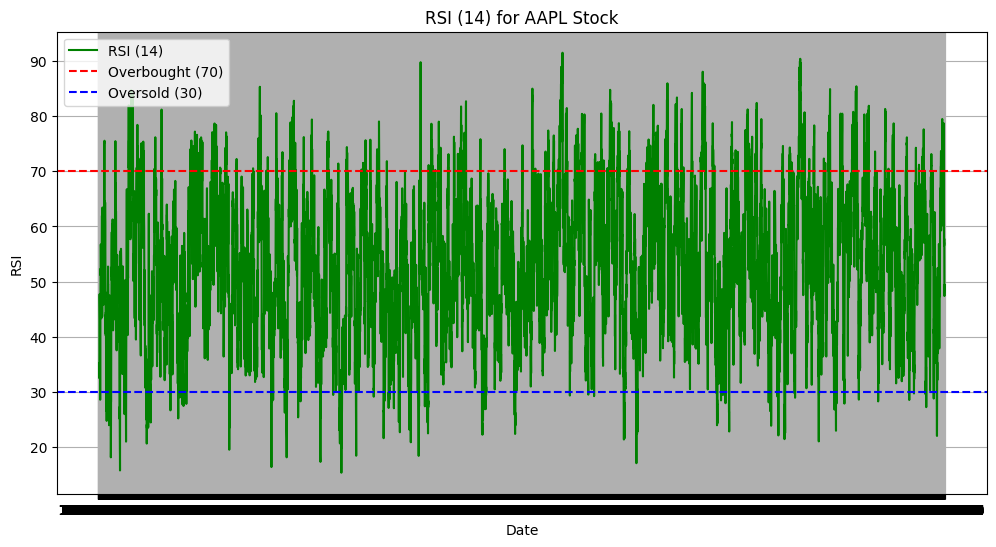

In [23]:
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
financial_analyzer.FinancialAnalyzer.plot_rsi(df)

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

msft = yf.Ticker("AAPL")
hist = msft.history(period="max")

fig = make_subplots(rows=1, cols=4, subplot_titles=['Close', 'Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=hist.index, y=hist['Close']), row=1, col=1)
fig.add_trace(go.Scatter(x=hist.index, y=hist['Open']), row=1, col=2)
fig.add_trace(go.Scatter(x=hist.index, y=hist['High']), row=1, col=3)
fig.add_trace(go.Scatter(x=hist.index, y=hist['Low']), row=1, col=4)

fig.update_layout(height=400, width=1200, title_text='Apple Stock Analysis')
fig.show()

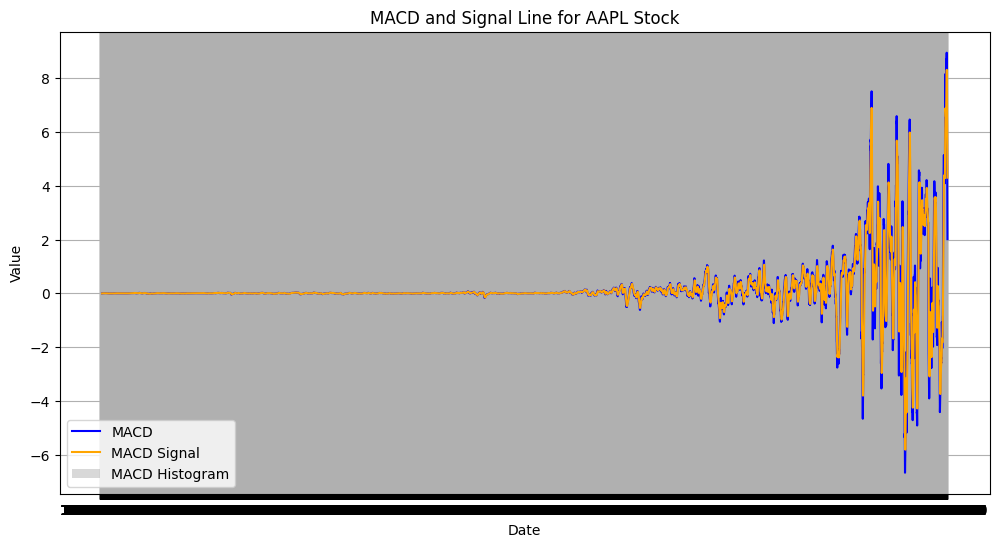

In [27]:
df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
financial_analyzer.FinancialAnalyzer.plot_macd(df)

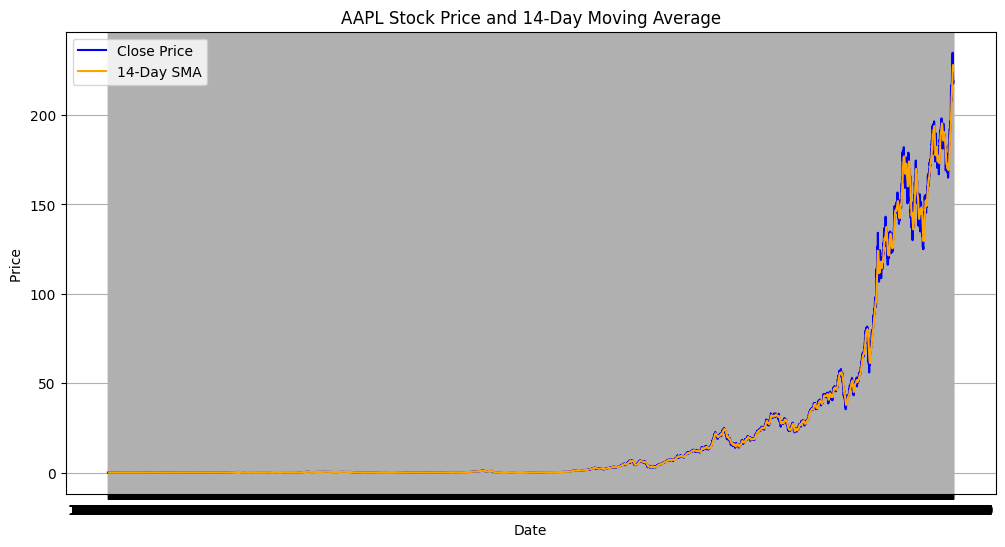

In [5]:
df['SMA_14'] = ta.SMA(df['Close'], timeperiod=14)
financial_analyzer.FinancialAnalyzer.plot_stock_and_sma(df)


In [ ]:
financial_analyzer.FinancialAnalyzer.calculate_bollinger_bands(df)